In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
symbols = [
    'IBM',
    'MSFT',
    'META',
    'INTC',
    'NEM',
    'AU',
    'AEM',
    'GFI'
]
data = yf.download(symbols)
portfolio_returns = data['Adj Close'].pct_change().dropna()

[*********************100%***********************]  8 of 8 completed


In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(portfolio_returns)

PCA(n_components=3)

In [4]:
pct = pca.explained_variance_ratio_
pca_components = pca.components_

(0.0, 100.0)

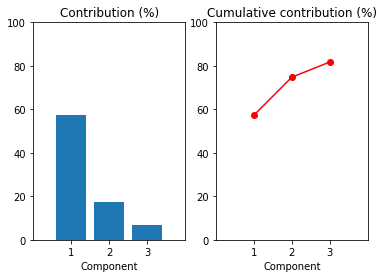

In [5]:
cum_pct = np.cumsum(pct)
x = np.arange(1,len(pct)+1,1)

plt.subplot(1, 2, 1)
plt.bar(x, pct * 100, align="center")
plt.title('Contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.plot(x, cum_pct * 100, 'ro-')
plt.title('Cumulative contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

In [6]:
X = np.asarray(portfolio_returns)

factor_returns = X.dot(pca_components.T)

factor_returns = pd.DataFrame(
    columns=["f1", "f2", "f3"], 
    index=portfolio_returns.index,
    data=factor_returns
)

factor_returns.head()

,f1,f2,f3
Date,,,
2012-05-21 00:00:00-04:00,-0.063636,0.071988,-0.078127
2012-05-22 00:00:00-04:00,0.009167,0.067882,-0.047075
2012-05-23 00:00:00-04:00,-0.078408,0.000647,0.023906
2012-05-24 00:00:00-04:00,-0.004359,-0.027111,0.011367
2012-05-25 00:00:00-04:00,-0.004619,0.025863,-0.017343
